In [1]:
import matplotlib.pyplot as pl
import numpy as np

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


# Tess Quick Look (TQL)

In [2]:
toiid=200

Available sectors: [1]
Using sector=1.


  0%|          | 0/2554 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 15989 data points, 2554 periods from 0.601 to 13.94 days
Using all 8 CPU threads


100%|██████████| 2554/2554 periods | 00:13<00:00
  0%|          | 1/6689 [00:00<16:15,  6.85it/s]

Searching for best T0 for period 3.26512 days


100%|██████████| 6689/6689 [00:01<00:00, 3382.48it/s]


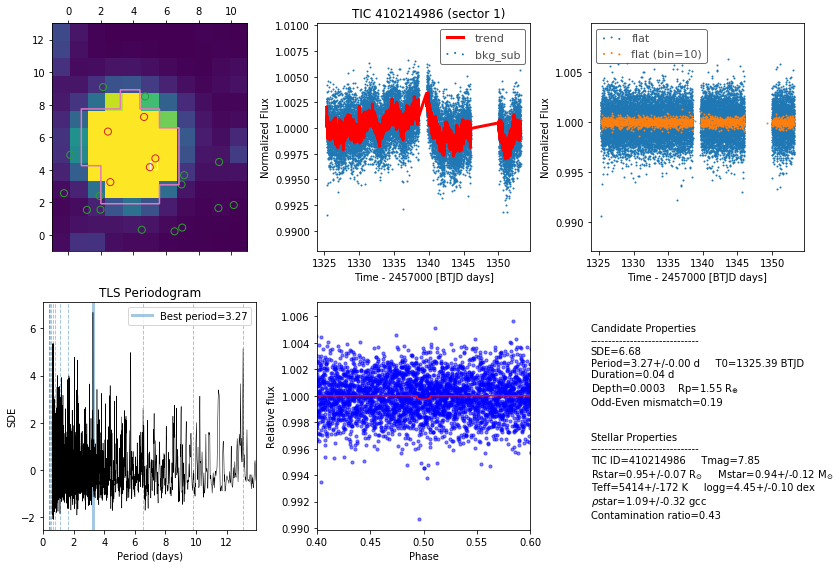

In [2]:
fig = cr.make_tql(toiid=toiid, cadence='short', sap_mask='pipeline')

# Inspect each step of TQL

## short cadence

In [17]:
#instantiate short cadence class
s = cr.ShortCadence(toiid=toiid)

#how many TESS sectors are available?
s.get_all_sectors()

Available sectors: [1]
Using sector=1.


[1]

Searching lightcurvefile for TIC 410214986 (sector 1)


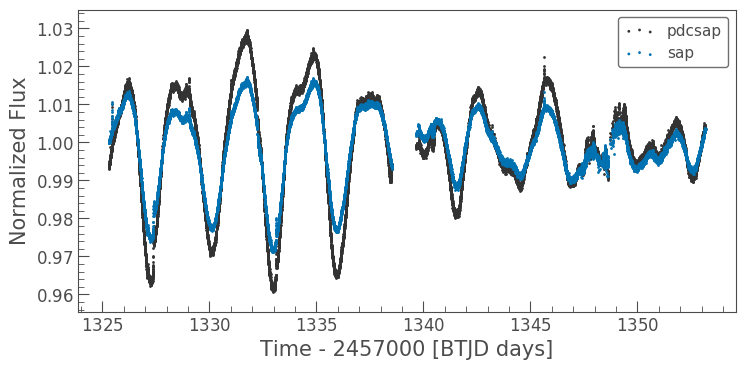

In [7]:
#get lightcurve
lc = s.get_lc(sector=1)

#compare sap and pdcsap lightcurves
ax = s.lc_pdcsap.normalize().scatter(label='pdcsap')
s.lc_sap.normalize().scatter(label='sap', ax=ax)

Searching targetpixelfile using lightkurve

Searching mast for TIC 410214986

1 tpf(s) found in sector(s) [1]
Using data from sector 1 only


Applying data quality mask identified in Data Release Notes (sector 1):
t<1346|t>1350

Querying Gaia DR2 catalog for 354.915 -69.196 within 120.0 arcsec.



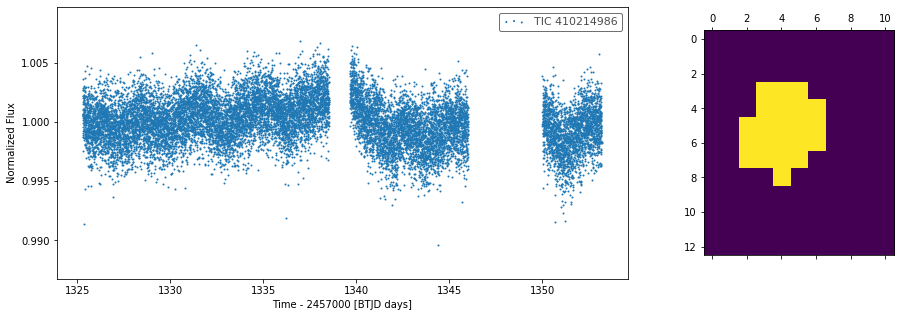

In [18]:
fig, ax = pl.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[3,1]})

#make custom lightcurve using pipeline mask
lc = s.make_custom_lc(sap_mask='pipeline')

#plot lightcurve on left
lc.scatter(ax=ax[0])

#plot aperture mask on right
ax[1].matshow(s.aper_mask)

Querying Gaia DR2 catalog for 354.915 -69.196 within 3.0 arcsec.

Querying Gaia DR2 catalog for 354.915 -69.196 within 60.0 arcsec.



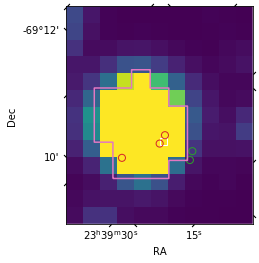

In [21]:
#query Gaia parameters of target
gaia_params = s.query_gaia_dr2_catalog(return_nearest_xmatch=True)

#query gaia sources around 1 arcmin of the target
gaia_sources = s.query_gaia_dr2_catalog(radius=60)

#plot aperture superposed on TESS image and nearby Gaia sources
ax = cr.plot_gaia_sources_on_tpf(tpf=s.tpf, 
                                 target_gaiaid=s.gaiaid, 
                                 gaia_sources=gaia_sources, 
                                 sap_mask=s.sap_mask, 
                                )

Querying DSS2 Red (120.00 arcsec x 120.00 arcsec) archival image


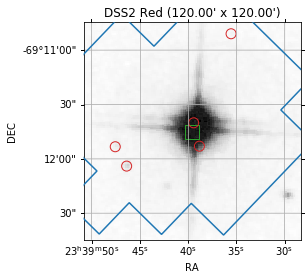

In [22]:
import astropy.units as u

#plot aperture superposed on archival image and nearby Gaia sources
ax = cr.plot_gaia_sources_on_survey(tpf=s.tpf, 
                                    target_gaiaid=s.gaiaid,
                                    gaia_sources=s.gaia_sources,
                                    sap_mask=s.sap_mask,
                                    fov_rad=120*u.arcsec
                                   )

## long cadence

In [9]:
#instantiate LongCadence class using square mask with 1 TESS pix radius
l = cr.LongCadence(toiid=toiid, sap_mask='square', aper_radius=1)

Available sectors: [1]
Using sector=1.


Searching targetpixelfile using Tesscut
Applying data quality mask identified in Data Release Notes (sector 1):
t<1346|t>1350

Brightest star detected is near the edges.
Aperture mask is placed at the center instead.

Querying Gaia DR2 catalog for 354.915 -69.196 within 120.0 arcsec.



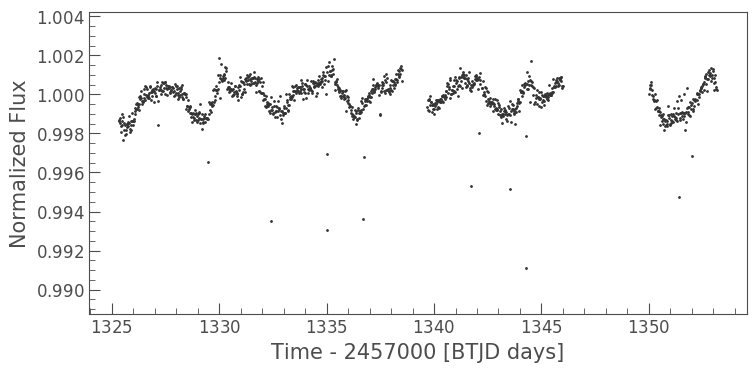

In [10]:
#make custom lightcurve using properties above
lc = l.make_custom_lc()
#plot
lc.scatter()

Querying Gaia DR2 catalog for 354.915 -69.196 within 3.0 arcsec.

Querying Gaia DR2 catalog for 354.915 -69.196 within 60.0 arcsec.

Brightest star detected is near the edges.
Aperture mask is placed at the center instead.



(20, 30)

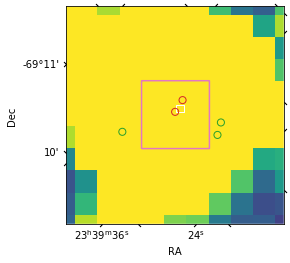

In [12]:
#query Gaia parameters of target
gaia_params = l.query_gaia_dr2_catalog(return_nearest_xmatch=True)

#query gaia sources around 1 arcmin of the target
gaia_sources = l.query_gaia_dr2_catalog(radius=60)

ax = cr.plot_gaia_sources_on_tpf(tpf=l.tpf_tesscut, 
                                 target_gaiaid=l.gaiaid, 
                                 gaia_sources=l.gaia_sources, 
                                 sap_mask=l.sap_mask, 
                                 aper_radius=l.aper_radius
                                )
#crop
d = l.cutout_size[0]//2
r = 5
ax.set_xlim(d-r,d+r)
ax.set_ylim(d-r,d+r)

Brightest star detected is near the edges.
Aperture mask is placed at the center instead.

Querying DSS2 Red (120.00 arcsec x 120.00 arcsec) archival image


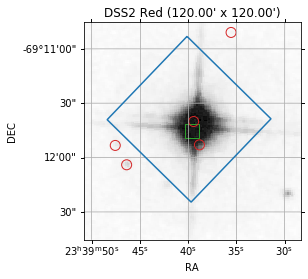

In [14]:
import astropy.units as u

ax = cr.plot_gaia_sources_on_survey(tpf=l.tpf_tesscut, 
                                    target_gaiaid=l.gaiaid,
                                    gaia_sources=l.gaia_sources,
                                    sap_mask=l.sap_mask,
                                    aper_radius=l.aper_radius,
                                    fov_rad=120*u.arcsec
                                   )

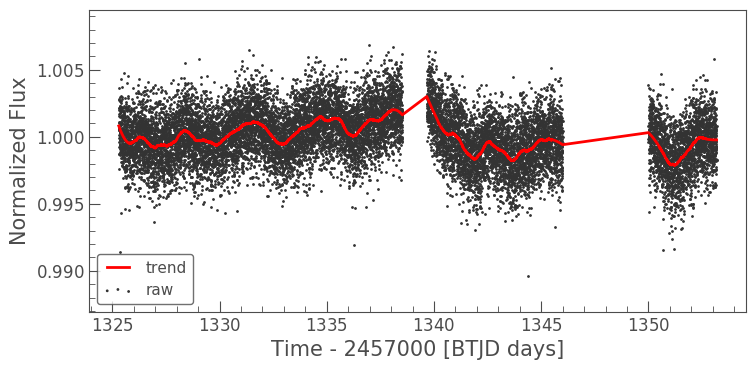

In [23]:
flat, trend = lc.flatten(window_length=701, break_tolerance=301, return_trend=True)
ax = lc.scatter(label='raw')
trend.plot(label='trend', lw=2, c='r', ax=ax)

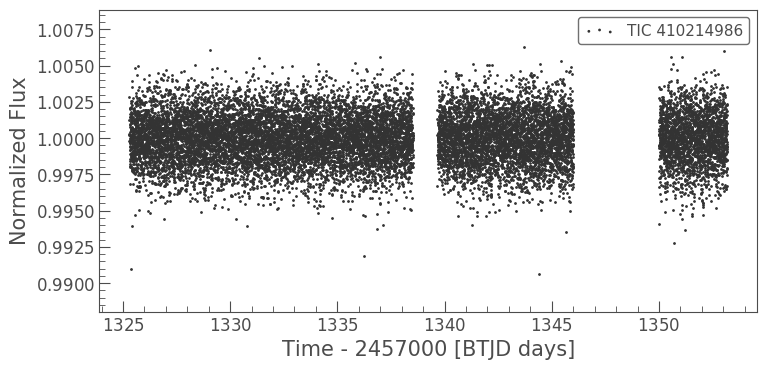

In [24]:
flat.scatter()

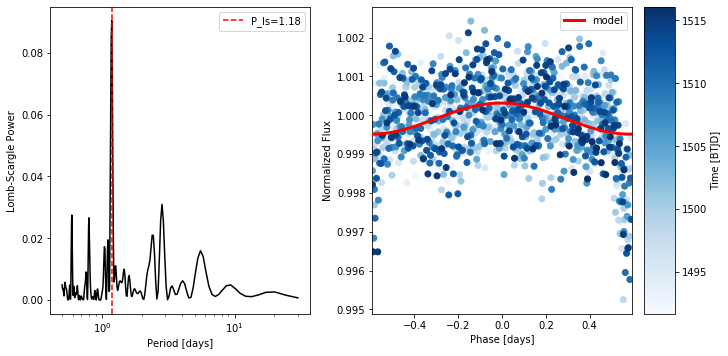

In [8]:
fig = cr.plot_lomb_scargle(lc.time, lc.flux);

  0%|          | 0/2182 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 27 durations
Searching 1086 data points, 2182 periods from 0.601 to 12.208 days
Using all 8 CPU threads


100%|██████████| 2182/2182 periods | 00:04<00:00 


(0.3, 0.7)

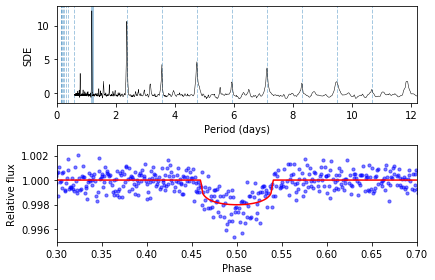

In [9]:
#search for transits using TLS

import transitleastsquares as tls

tls_results = tls.transitleastsquares(flat.time, flat.flux).power()
fig = cr.plot_tls(tls_results);
fig.axes[1].set_xlim(0.3,0.7)

(-0.3, 0.3)

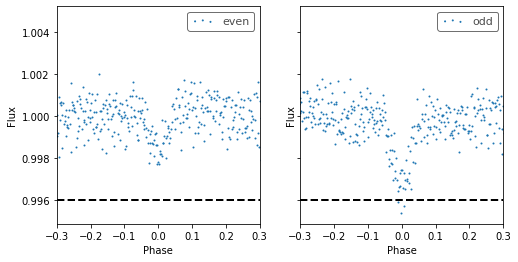

In [13]:
#check for variation odd-even transits

xlims = (-0.3,0.3)
y =0.996

fig, axs = pl.subplots(1,2, figsize=(8,4), sharey=True)
fold = flat.fold(period=tls_results.period, t0=tls_results.T0)

ax = axs[0]
fold[fold.even_mask].scatter(label='even', ax=ax)
ax.axhline(y, 0, 1, lw=2, ls='--', c='k')
ax.set_xlim(*xlims)

ax = axs[1]
fold[fold.odd_mask].scatter(label='odd', ax=ax)
ax.axhline(y, 0, 1, lw=2, ls='--', c='k')
ax.set_xlim(*xlims)

In [11]:
import astropy.units as u

tic_params = l.query_tic_catalog(return_nearest_xmatch=True)
Rp = tls_results['rp_rs']*l.tic_params['rad']*u.Rsun.to(u.Rearth)
Rp

Querying TIC catalog for 106.211 -8.56657
            within 3.0 arcsec.



3.263596965549694

Brightest star detected is near the edges.
Aperture mask is placed at the center instead.

Querying DSS2 Red (120.00 arcsec x 120.00 arcsec) archival image


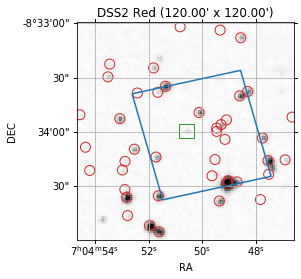

In [12]:
import astropy.units as u

#check which Gaia source is ruled out as potential NEB based on transit depth
ax = cr.plot_gaia_sources_on_survey(tpf=l.tpf_tesscut, 
                                    target_gaiaid=l.gaiaid, 
                                    gaia_sources=l.gaia_sources,
                                    sap_mask=l.sap_mask, 
                                    aper_radius=l.aper_radius,
                                    fov_rad=120*u.arcsec,
                                    depth=1-tls_results.depth
                                   )

  0%|          | 0/2173 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 27 durations
Searching 919 data points, 2173 periods from 0.601 to 12.167 days
Using all 8 CPU threads


100%|██████████| 2173/2173 periods | 00:03<00:00


(0.4, 0.6)

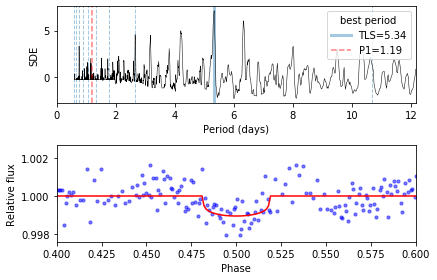

In [14]:
#search for additional periodic signals

#mask transit
intransit = tls.transit_mask(lc.time, tls_results.period, 2*tls_results.duration, tls_results.T0)
time2 = lc.time[~intransit]
flux2 = lc.flux[~intransit]

#re-run tls
tls_results2 = tls.transitleastsquares(time2, flux2).power()

fig = cr.plot_tls(tls_results2);
#add period from toi release for reference 
fig.axes[0].axvline(tls_results.period, 0, 1, c='r', ls='--', alpha=0.5, label=f'P1={tls_results.period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)